In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [8]:
def plot_predictions(clf, axes):
  x0_ax = np.linspace(axes[0], axes[1], 100)
  x1_ax = np.linspace(axes[2], axes[3], 100)
  x0,x1 = np.meshgrid(x0_ax,x1_ax)
  X = np.c_[x0.ravel(),x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0,x1,y_pred, cmp = plt.cm.brg, alpha=0.2)
  plt.contourf(x0,x1,y_decision, cmp = plt.cm.brg, alpha=0.2)

def basePlot(X,y, axes,title):
  plt.plot(X[:,0][y==0], X[:,1][y==0], "b^")
  plt.plot(X[:,0][y==1], X[:,1][y==1], "rs")
  plt.axis(axes)
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
  plt.title(title, fontsize=15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'cmp'
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'cmp'
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'cmp'
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'cmp'
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'cmp'
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'cmp'
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 

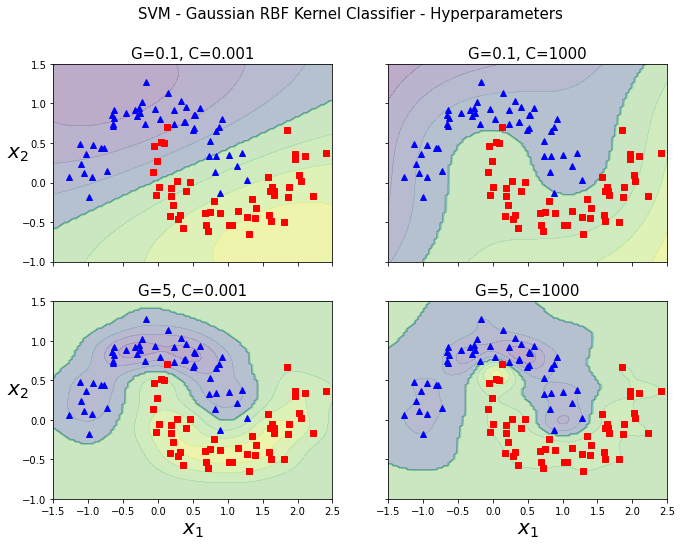

In [29]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X,y = make_moons(n_samples=100,noise=0.15, random_state=42)
g1,g2=0.1,5
c1,c2=0.001,1000
hyperparameters = (g1,c1),(g1,c2),(g2,c1),(g2,c2)
model_rbf=[]
for gamma, C  in hyperparameters:
  rbf_model = Pipeline([ ("scale" ,StandardScaler()),
                  ("svm_clf" ,SVC(kernel="rbf",gamma=gamma, C=C))
                    ])
  rbf_model.fit(X,y)
  model_rbf.append(rbf_model)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 8), sharex=True, sharey=True)

for i, model in enumerate(model_rbf):
  plt.sca(axes[i // 2, i % 2])
  g,c=hyperparameters[i] 
  basePlot(X, y, [-1.5, 2.5, -1, 1.5], f"G={g}, C={c}")
  plot_predictions(model, [-1.5, 2.5, -1, 1.5])
  if (i==0 or i==1):
    plt.xlabel("")
  if (i==1 or i==3):
    plt.ylabel("")
  
plt.suptitle("SVM - Gaussian RBF Kernel Classifier - Hyperparameters", fontsize=15)
plt.savefig("rbf")

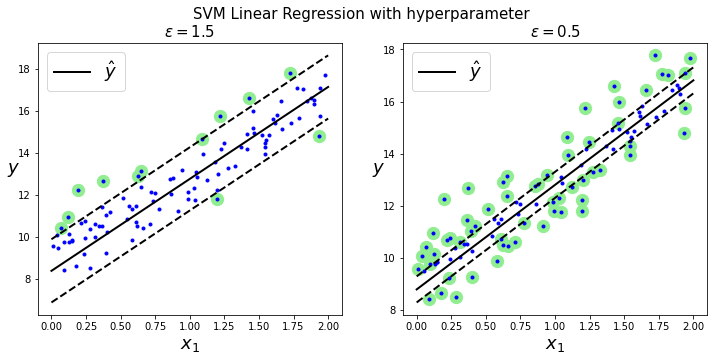

In [63]:
from sklearn.svm import LinearSVR

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = (9 + 4 * X + np.random.randn(m, 1)).ravel()

svr_reg_model1 = LinearSVR(epsilon=1.5, random_state=42)
svr_reg_model2 = LinearSVR(epsilon=0.5, random_state=42)
svr_reg_model1.fit(X,y)
svr_reg_model2.fit(X,y)

def getSupportVector (model, X,y):
  y_pred = model.predict(X)
  off_margin = (np.abs(y - y_pred) >= model.epsilon)
  return np.argwhere(off_margin)

svr_reg_model1.support_ = getSupportVector(svr_reg_model1, X, y)
svr_reg_model2.support_ = getSupportVector(svr_reg_model2, X, y)

def plot_svm_reg(X,y,model,axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = model.predict(x1s)
    plt.plot(X,y,"b.")
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + model.epsilon, "k--", lw=2)
    plt.plot(x1s, y_pred - model.epsilon, "k--", lw=2)
    plt.scatter(X[model.support_],y[model.support_], color="lightgreen", s=150)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.ylabel(r"$y$", fontsize=18, rotation=0)
    plt.title(r"$\epsilon = {}$".format(model.epsilon), fontsize=15)

plt.figure(figsize=(12,5))
plt.subplot(121)
plot_svm_reg(X,y,svr_reg_model1,[0,2,2,10])
plt.subplot(122)
plot_svm_reg(X,y,svr_reg_model2,[0,2,2,10])
plt.suptitle("SVM Linear Regression with hyperparameter", fontsize=15)
plt.savefig('svm_reg_lin')

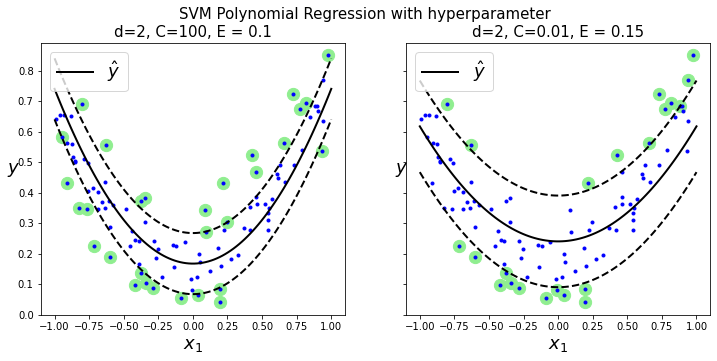

In [64]:
from sklearn.svm import SVR

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

svr_regPol_model1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svr_regPol_model2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.15, gamma="scale") 
svr_regPol_model1.fit(X,y)
svr_regPol_model2.fit(X,y)

fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
plt.sca(axes[0])
plot_svm_reg(X, y,svr_regPol_model1, [-1, 1, 0, 1])
plt.title(fr"d={svr_regPol_model1.degree}, C={svr_regPol_model1.C}, E = {svr_regPol_model1.epsilon}", fontsize=15)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_reg(X, y,svr_regPol_model2, [-1, 1, 0, 1])
plt.title(fr"d={svr_regPol_model2.degree}, C={svr_regPol_model2.C}, E = {svr_regPol_model2.epsilon}", fontsize=15)
plt.suptitle("SVM Polynomial Regression with hyperparameter", fontsize=15)
plt.savefig('svm_reg_pol')